# Datojen haku ja esikäsittely

In [1]:
from set_path import set_path
mainpath, path = set_path('areadata')

In [2]:
from read_and_prepare_data import read_and_prepare_data
stat, post, kunta_stat, vaalidata = read_and_prepare_data(path)

read_and_prepare_data  read from start
read_post_muncipalities  read from file
read_stats_postcode  read from file
read_ravintolat_ja_kaupat  read from file
read_kiinteisto  read from file
read_vaalit  read from file


In [3]:
from selected_cols import selected_cols
numeric_features, categorical_features = selected_cols(largeset=True, parties=False)

In [4]:
from sklearn.feature_selection import  mutual_info_classif
import pandas as pd

from draw_and_create_clusters import create_kmeans_clusters 

from prepare_and_scale_data import prepare_and_scale_data
from create_prediction import select_kbest
from select_columns_and_clean_data import select_columns_and_clean_data

from draw_and_create_clusters import draw_pca, drawTSNE,  display_scree_plot, display_circles, display_parallel_coordinates_centroids, display_factorial_planes
from delete_outliers import delete_outliers

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load the TensorBoard notebook extension
%load_ext tensorboard

pd.options.display.max_colwidth = 100


selected = stat.copy()
selected_vaalidata = vaalidata.copy()
post_included = post.copy()

selected = stat[(stat['muncipality_code']==49)].copy()
selected_vaalidata = vaalidata[(vaalidata['Kuntanumero']==49)].copy()
post_included = post[post['muncipality_code']==49]['postcode'].copy()


selected = stat[(stat['muncipality_code']==91)].copy()
selected_vaalidata = vaalidata[(vaalidata['Kuntanumero']==91)].copy()
post_included = post[post['muncipality_code']==91]['postcode'].copy()

selected = stat[stat['area_code']=='FI1B1'].copy()
selected_vaalidata = vaalidata[vaalidata['area_code']=='FI1B1'].copy()
post_included = post[post['area_code']=='FI1B1'].copy()

selected = stat.copy()
selected_vaalidata = vaalidata.copy()
post_included = post.copy()



In [5]:
from create_target_columns import create_target_columns
from create_neuro_prediction import create_neuro_prediction
list_of_partiest = ['VIHR', 'KOK', 'SDP', 'KD', 'KESK', 'RKP', 'PS', 'VAS']
target_col_start = 'Äänet yhteensä lkm'
target = create_target_columns(list_of_partiest, target_col_start)

data, test, model, hist, log_path = create_neuro_prediction(selected, selected, target, mainpath, numeric_features=numeric_features, categorical_features=categorical_features, scaled=True, test_size = 0.2, Skfold=False)

Train for 60 steps, validate for 15 steps
Epoch 1/50
60/60 [==============================] - 5s 83ms/step - loss: 57600.7101 - mean_squared_error: 57977.5117 - val_loss: 50203.0039 - val_mean_squared_error: 50103.1328
Epoch 2/50
60/60 [==============================] - 2s 34ms/step - loss: 38459.7466 - mean_squared_error: 38306.8203 - val_loss: 45245.4698 - val_mean_squared_error: 45195.5742
Epoch 3/50
60/60 [==============================] - 2s 38ms/step - loss: 35142.1272 - mean_squared_error: 35125.7422 - val_loss: 40283.0591 - val_mean_squared_error: 40280.7070
Epoch 4/50
60/60 [==============================] - 2s 32ms/step - loss: 30207.8412 - mean_squared_error: 30384.8594 - val_loss: 36822.5164 - val_mean_squared_error: 36808.4805
Epoch 5/50
60/60 [==============================] - 2s 31ms/step - loss: 29702.8486 - mean_squared_error: 29868.6699 - val_loss: 33637.4583 - val_mean_squared_error: 33667.0352
Epoch 6/50
60/60 [==============================] - 2s 29ms/step - loss: 

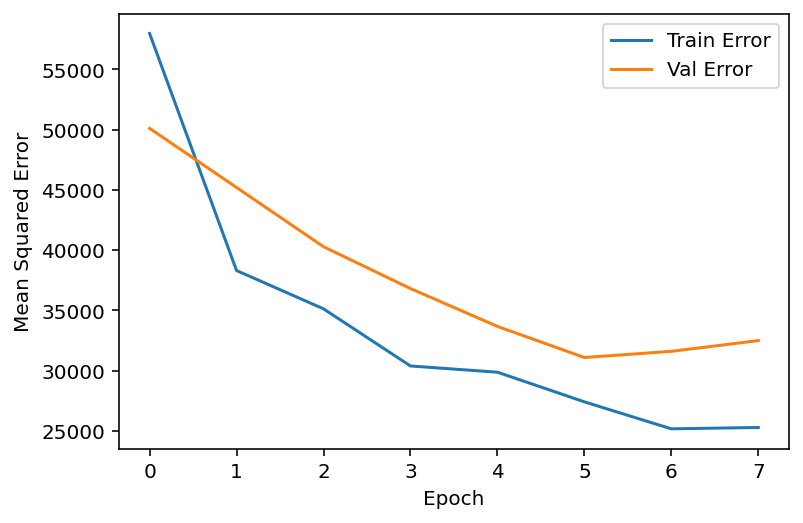

In [6]:
from create_neuro_prediction import plot_history
plot_history(hist)

In [7]:
from show_election_result import show_election_result
show_election_result(data, selected_vaalidata, target_col_start, list_of_partiest)

VIHR  lasketut äänet: Aitotulos  354152 Laskennallinen  344923 Ennuste  442829
Laskennallisen virhe aitoon tulokseen 2.606 %
Ennusteen virhe aitoon tulokseen -25.039 %
Ennusteen virhe laskennalliseen tulokseen -28.385 %

KOK  lasketut äänet: Aitotulos  523924 Laskennallinen  514725 Ennuste  612610
Laskennallisen virhe aitoon tulokseen 1.756 %
Ennusteen virhe aitoon tulokseen -16.927 %
Ennusteen virhe laskennalliseen tulokseen -19.017 %

SDP  lasketut äänet: Aitotulos  546263 Laskennallinen  538933 Ennuste  605140
Laskennallisen virhe aitoon tulokseen 1.342 %
Ennusteen virhe aitoon tulokseen -10.778 %
Ennusteen virhe laskennalliseen tulokseen -12.285 %

KD  lasketut äänet: Aitotulos  120019 Laskennallinen  117317 Ennuste  121275
Laskennallisen virhe aitoon tulokseen 2.251 %
Ennusteen virhe aitoon tulokseen -1.046 %
Ennusteen virhe laskennalliseen tulokseen -3.374 %

KESK  lasketut äänet: Aitotulos  423511 Laskennallinen  415357 Ennuste  411517
Laskennallisen virhe aitoon tulokseen 1.925

In [ ]:
#%tensorboard --logdir=log_path